<a href="https://colab.research.google.com/github/ahnsun98/COMPUTER_VISION_INFOS/blob/main/ML_Kor_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from konlpy.tag import Okt

okt = Okt()

def read_data(filename):
    with open(filename, 'r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        # txt 파일의 헤더(id document label)는 제외하기
        data = data[1:]
    return data

train_data = read_data('ratings_train.txt')
test_data = read_data('ratings_test.txt')

print(len(train_data))
print(len(train_data[0]))
print(len(test_data))
print(len(test_data[0]))

import json
import os
from pprint import pprint

def tokenize(doc):
    print(doc)
    # norm은 정규화, stem은 근어로 표시하기를 나타냄
    return ['/'.join(t) for t in okt.pos(doc, norm=True, stem=True)]

if os.path.isfile('train_docs.json'):
    with open('train_docs.json') as f:
        train_docs = json.load(f)
    with open('test_docs.json') as f:
        test_docs = json.load(f)
else:
    train_docs = [(tokenize(row[1]), row[2]) for row in train_data]
    test_docs = [(tokenize(row[1]), row[2]) for row in test_data]
    # JSON 파일로 저장
    with open('train_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(train_docs, make_file, ensure_ascii=False, indent="\t")
    with open('test_docs.json', 'w', encoding="utf-8") as make_file:
        json.dump(test_docs, make_file, ensure_ascii=False, indent="\t")

tokens = [t for d in train_docs for t in d[0]]
print(len(tokens))

import nltk
text = nltk.Text(tokens, name='NMSC')

# 전체 토큰의 개수
print(len(text.tokens))

# 중복을 제외한 토큰의 개수
print(len(set(text.tokens)))            

# 출현 빈도가 높은 상위 토큰 10개
pprint(text.vocab().most_common(10))

In [ ]:
!apt -qq -y install fonts-nanum > /dev/null
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

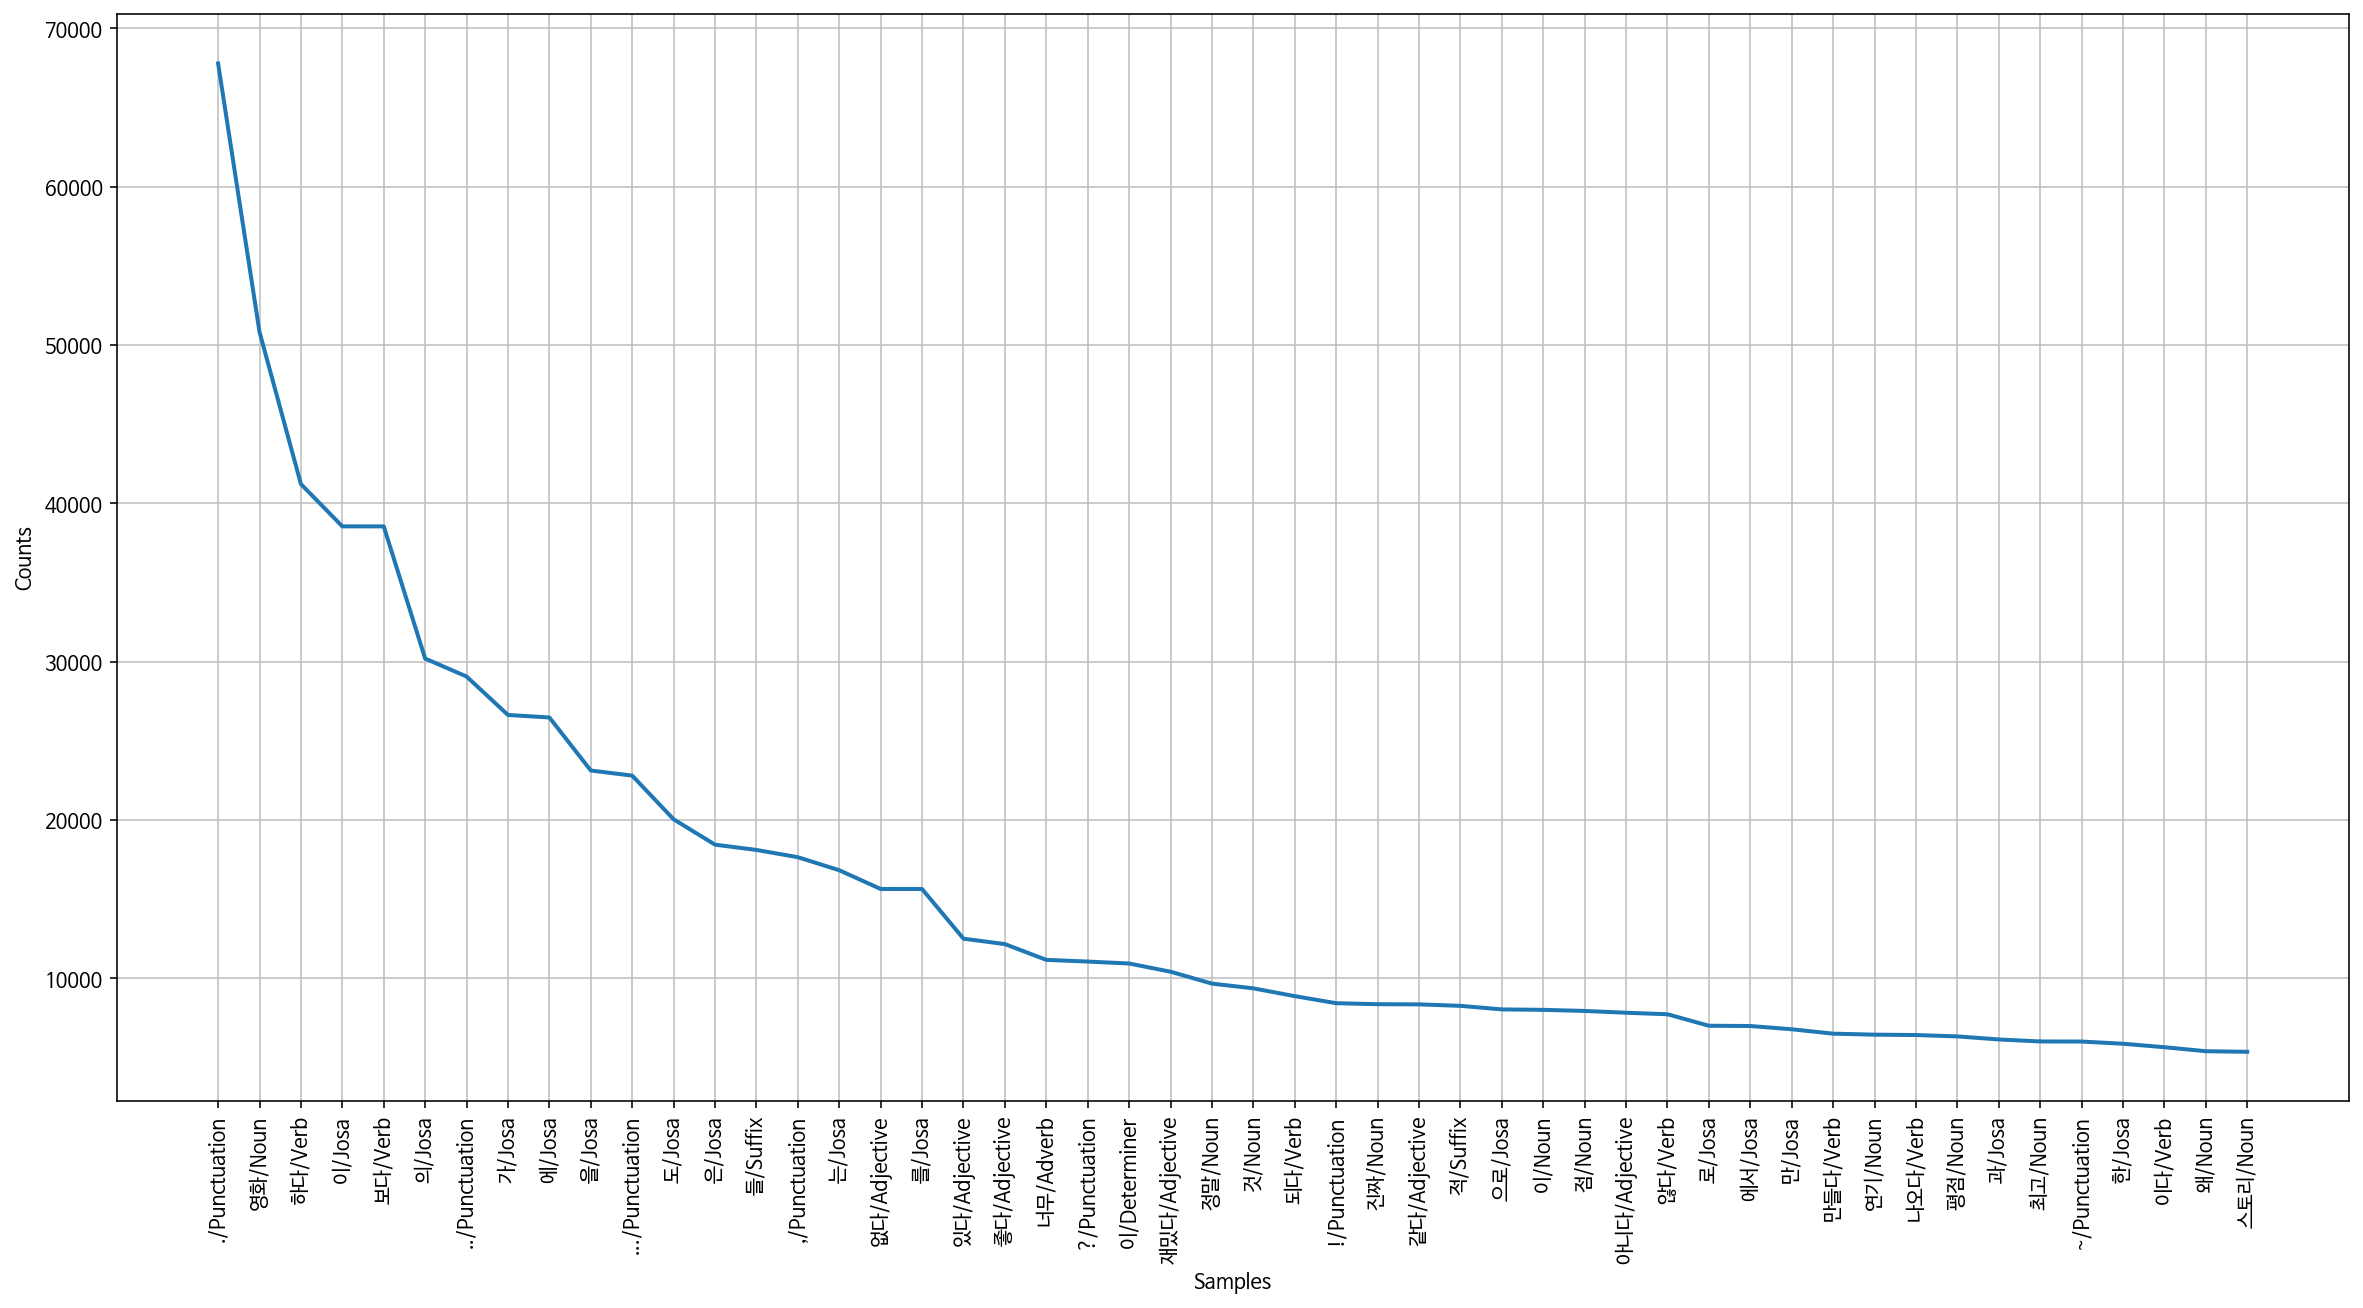

In [ ]:
plt.figure(figsize=(20,10))
text.plot(50)

In [ ]:
selected_words = [f[0] for f in text.vocab().most_common(100)]

def term_frequency(doc):
    return [doc.count(word) for word in selected_words]

train_x = [term_frequency(d) for d, _ in train_docs]
test_x = [term_frequency(d) for d, _ in test_docs]
train_y = [c for _, c in train_docs]
test_y = [c for _, c in test_docs]

In [ ]:
import numpy as np

#np.array()와의 차이점 : 이미 array의 데이터 형태(data type)가 설정 되어 있다면, 데이터 형태가 다를 경우에만 복사(copy)하여 배열 생성
x_train = np.asarray(train_x).astype('float32')
x_test = np.asarray(test_x).astype('float32')

y_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

#모델 지정
model = models.Sequential() #Sequential 클래스(가장 자주 사용하는 구조인 층을 순서대로 쌓아 올린 네트워크)로 모델 정의
model.add(layers.Dense(64, activation='relu', input_shape=(100,))) #첫 번째 층 : 변화시킬 노드 수, 활성화함수(relu함수) 정의, 입력 데이터 크기 전달
model.add(layers.Dense(64, activation='relu')) #두 번째 층
model.add(layers.Dense(1, activation='sigmoid')) #세 번째 층

#모델 컴파일
model.compile(optimizer=optimizers.RMSprop(lr=0.001), #최적화 설정 : 데이터의 손실함수를 최소화 하는 방향으로 모델 업데이트 방법 결정 https://ganghee-lee.tistory.com/24
             loss=losses.binary_crossentropy, #손실함수 설정 : 훈련하는 동안 모델의 오차를 측정, 최소화하는 방향으로 가야함 https://bskyvision.com/822
             metrics=[metrics.binary_accuracy]) #지표 설정 : 훈련 단계와 테스트 단계 모니터링을 위해 사용 https://needjarvis.tistory.com/568

#모델 훈련
model.fit(x_train, y_train, epochs=10, batch_size=512) #epochs : 반복 횟수, batch_size : 512개 샘플씩 미니배치법 사용

#정확도 측정
results = model.evaluate(x_test, y_test) #result=(test_loss, test_acc 정확도)

Epoch 1/10
293/293 [==============================] - 1s 3ms/step - loss: 0.5950 - binary_accuracy: 0.6700
Epoch 2/10
293/293 [==============================] - 1s 3ms/step - loss: 0.5314 - binary_accuracy: 0.7123
Epoch 3/10
293/293 [==============================] - 1s 3ms/step - loss: 0.5251 - binary_accuracy: 0.7186
Epoch 4/10
293/293 [==============================] - 1s 3ms/step - loss: 0.5175 - binary_accuracy: 0.7208
Epoch 5/10
293/293 [==============================] - 1s 3ms/step - loss: 0.5142 - binary_accuracy: 0.7247
Epoch 6/10
293/293 [==============================] - 1s 3ms/step - loss: 0.5096 - binary_accuracy: 0.7279
Epoch 7/10
293/293 [==============================] - 1s 2ms/step - loss: 0.5041 - binary_accuracy: 0.7321
Epoch 8/10
293/293 [==============================] - 1s 2ms/step - loss: 0.5005 - binary_accuracy: 0.7365
Epoch 9/10
293/293 [==============================] - 1s 3ms/step - loss: 0.4981 - binary_accuracy: 0.7367
Epoch 10/10
1563/1563 [==============

In [ ]:
results

[0.5210720300674438, 0.718779981136322]

In [ ]:
def predict_pos_neg(review):
    token = tokenize(review)
    tf = term_frequency(token)
    data = np.expand_dims(np.asarray(tf).astype('float32'), axis=0)
    score = float(model.predict(data)) #모델 예측(각 데이터의 예측값 반환)
    if(score > 0.5):
        print("[{}]는 {:.2f}% 긍정 \n".format(review, score * 100))
    else:
        print("[{}]는 {:.2f}% 부정 \n".format(review, (1 - score) * 100))

In [ ]:
predict_pos_neg("절반 동안 해놓은 일 있으면 하나만 알려달라")


절반 동안 해놓은 일 있으면 하나만 알려달라
[절반 동안 해놓은 일 있으면 하나만 알려달라]는 67.37% 긍정 

